### Documentation

Link => https://seaborn.pydata.org/

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

In [6]:
tips.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


/tmp/ipykernel_30594/1797612507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

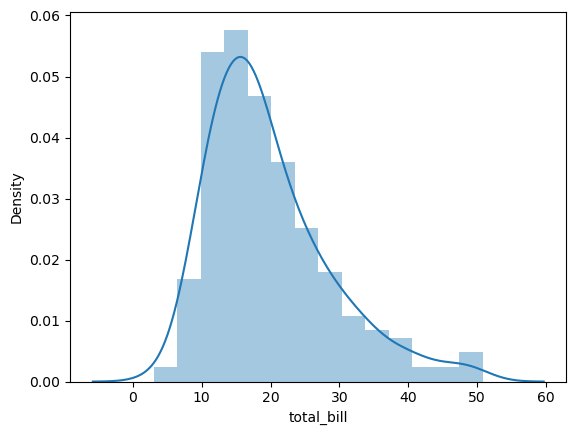

In [7]:
sns.distplot(tips['total_bill'])
# line is called 'kde'

/tmp/ipykernel_30594/2337428669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False)


<Axes: xlabel='total_bill'>

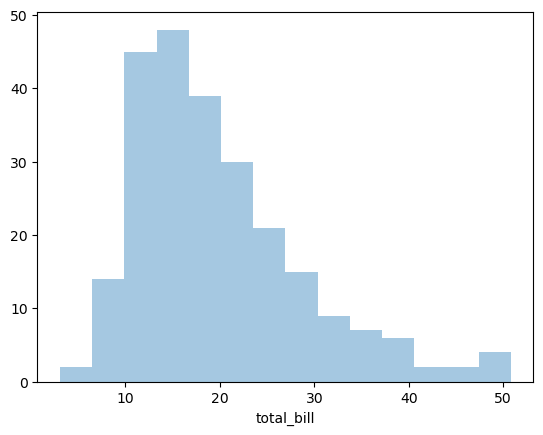

In [8]:
sns.distplot(tips['total_bill'], kde=False)

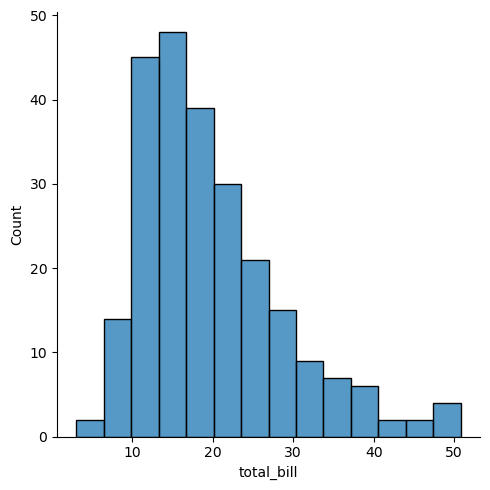

In [9]:
sns.displot(tips['total_bill'])

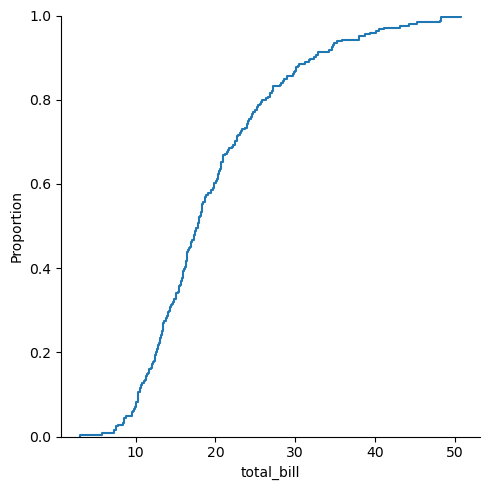

In [10]:
sns.displot(tips['total_bill'], kind='ecdf')

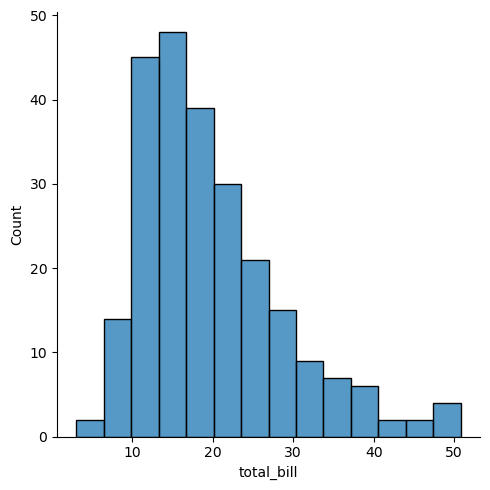

In [11]:
sns.displot(tips['total_bill'], kind='hist')

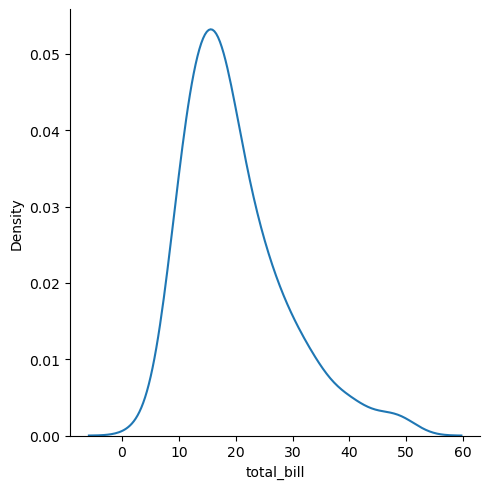

In [12]:
sns.displot(tips['total_bill'], kind='kde')

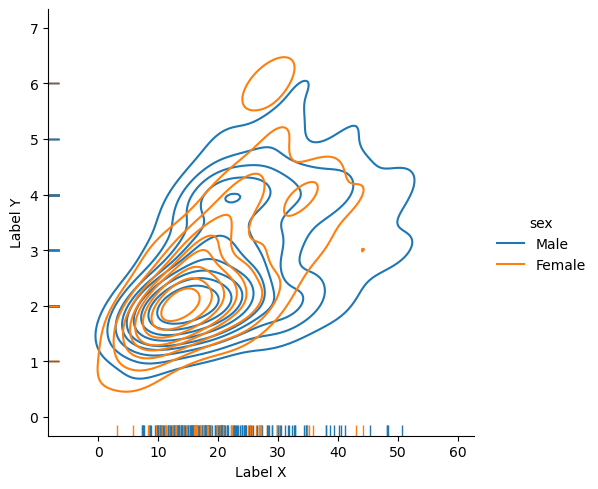

In [13]:
displot = sns.displot(data=tips, x='total_bill', y='size', hue='sex', kind='kde', rug=True)
displot.set_axis_labels("Label X", "Label Y")
displot.set_titles("Title")

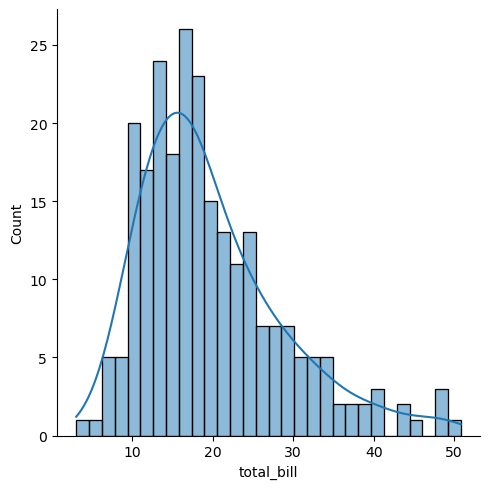

In [14]:
sns.displot(tips['total_bill'], kde=True, bins=30)

### joinplot

- scatter
- reg
- resid
- kde
- hex

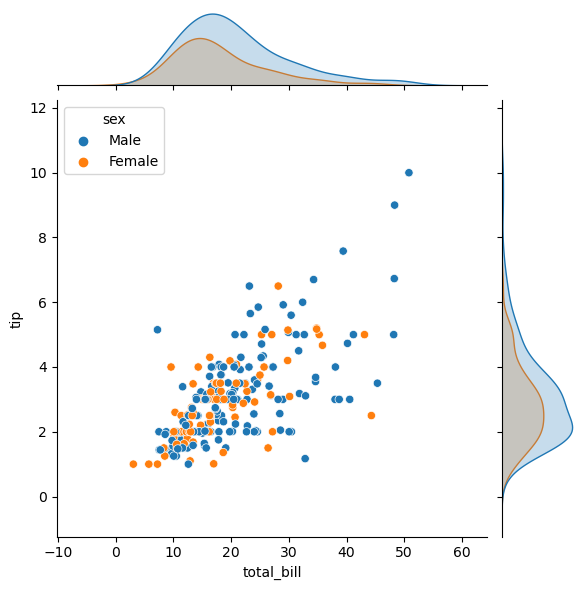

In [15]:
sns.jointplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    hue='sex',
    marker='o',
)# kind='scatter' (default)

# data => dataframe
# x and y => dataframe columns

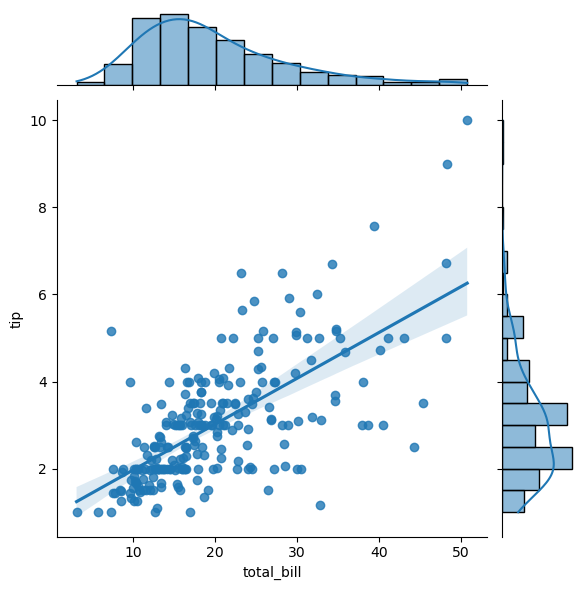

In [16]:
sns.jointplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    kind='reg',
    palette='deep'
)

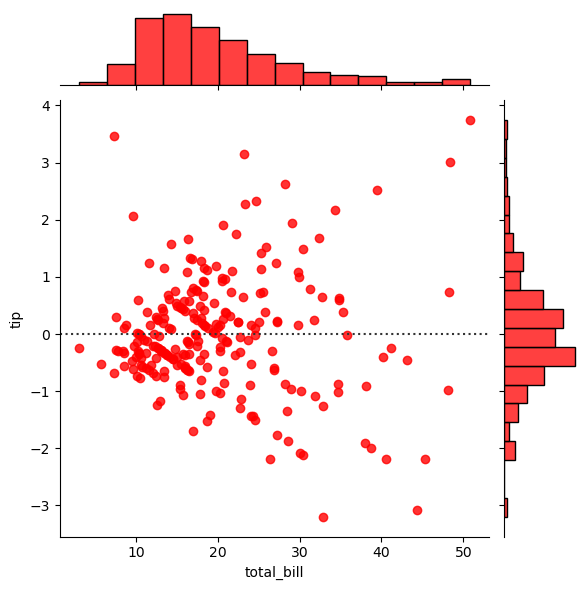

In [17]:
sns.jointplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    kind='resid',
    color='r',
)

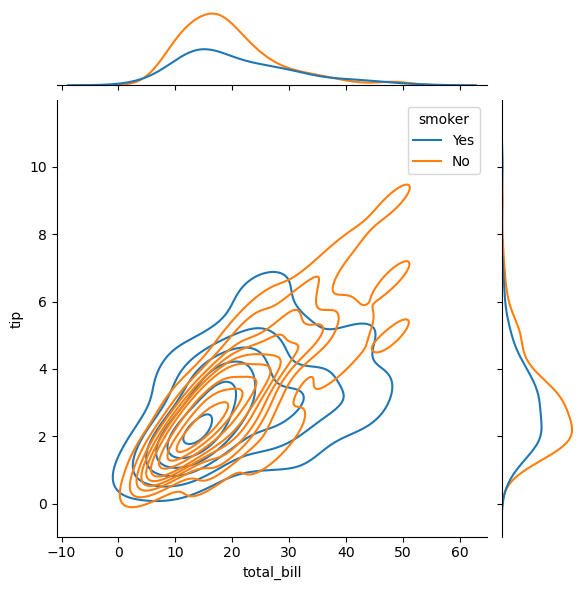

In [18]:
sns.jointplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    kind='kde',
    hue='smoker'
)

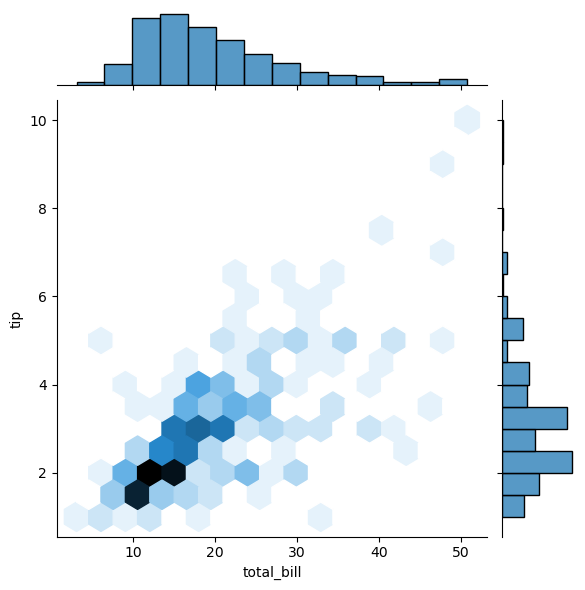

In [19]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

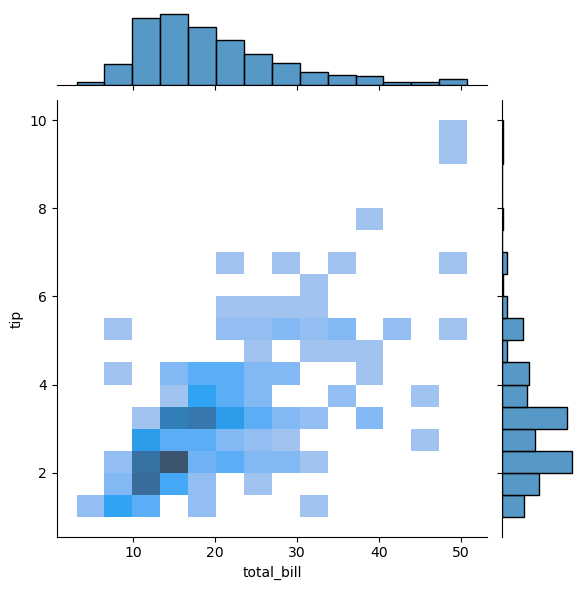

In [20]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hist')

### pairplot

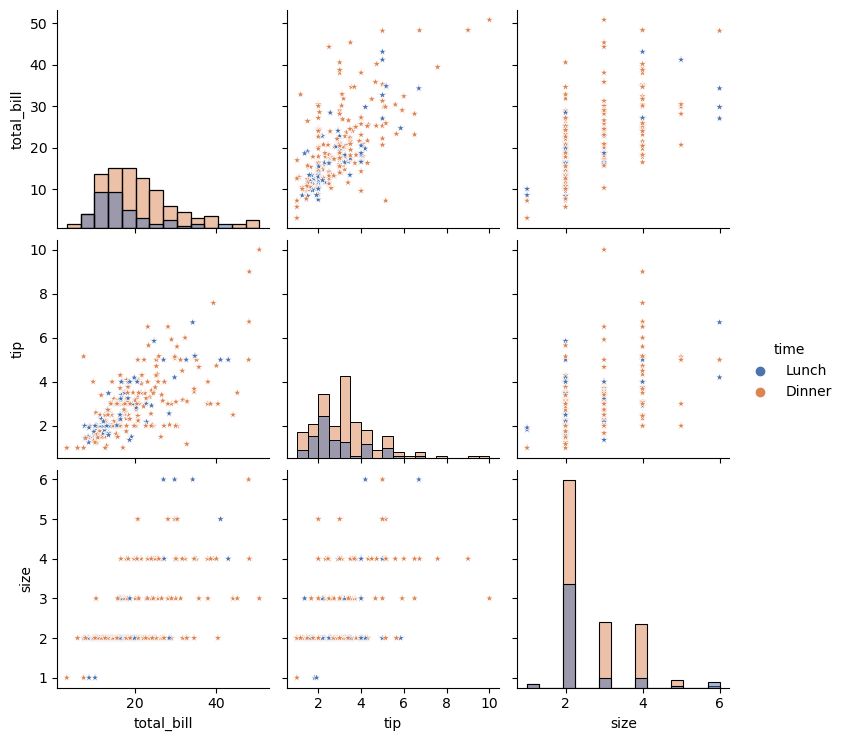

In [21]:
sns.pairplot(
    tips, 
    hue='time', 
    kind='scatter',
    markers='*',
    palette='deep',
    diag_kind='hist', # subplots na linha diagonal
    
)

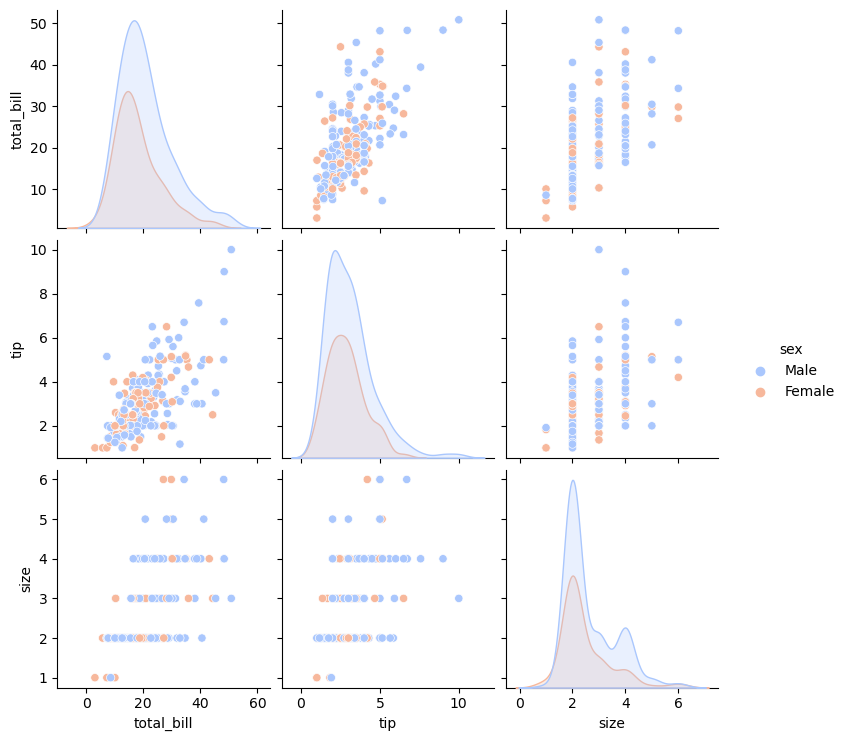

In [22]:
sns.pairplot(
    tips, 
    hue='sex', 
    palette='coolwarm',
    dropna=True
).savefig('test.png', dpi=70)

### rugplot

<Axes: xlabel='total_bill'>

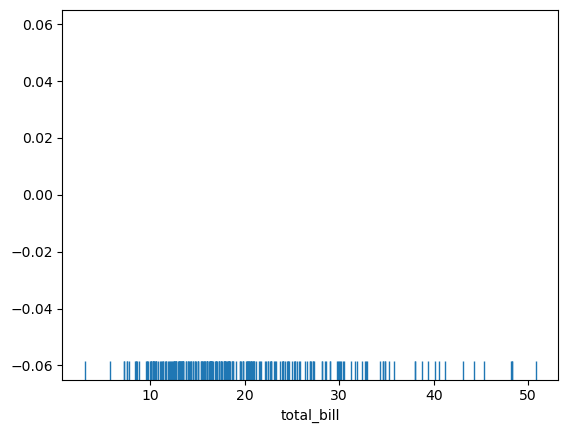

In [23]:
sns.rugplot(
    tips['total_bill'],
    height=.05,
)

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

(0.0, 1.0)

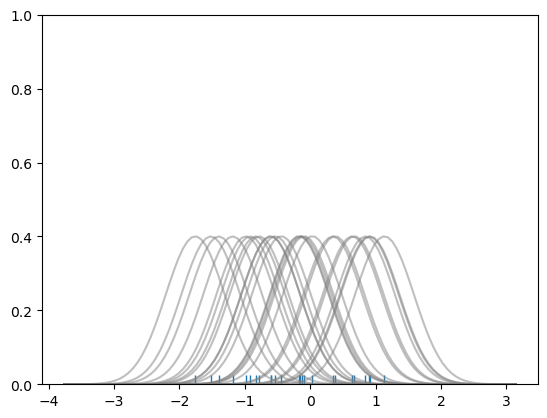

In [25]:
# Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset)

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwith = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

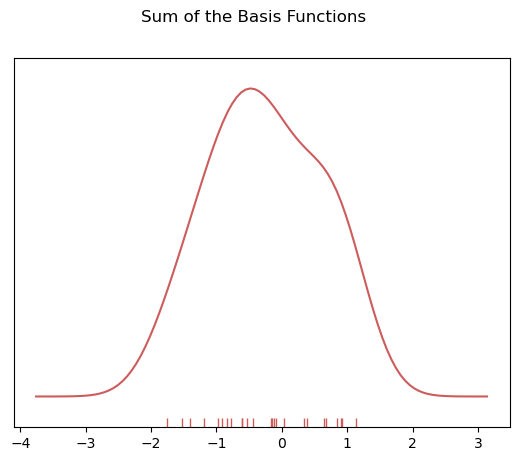

In [26]:
# To get the kde plot we can sum these basis functions.

# PLot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

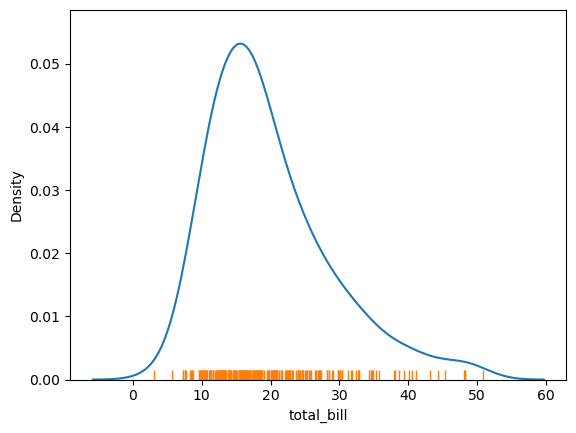

In [27]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

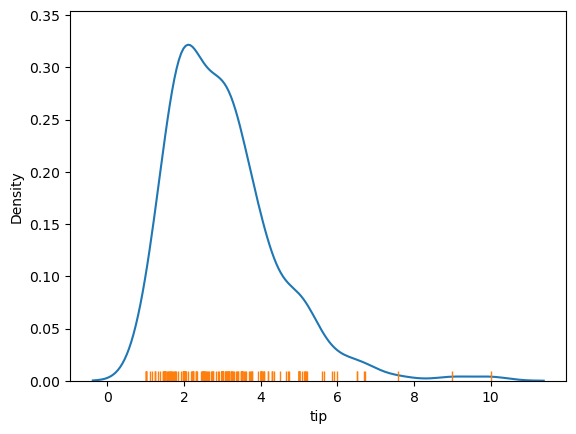

In [28]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])